## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
PATIENCE = [5, 10, 15]

In [11]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping

results = {}
for i, patience in enumerate(PATIENCE):
    earlystop = EarlyStopping(monitor="val_accuracy", 
                              patience=patience, 
                              verbose=1
                              )
    """Code Here
    撰寫你的訓練流程並將結果用 dictionary 紀錄
    """

    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop]
             )

# Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-%s-patience-%s" % (i, patience)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 296us/step - loss: 2.6689 - accuracy: 0.1506 - val_loss: 2.1792 - val_accuracy: 0.1896
Epoch 2/50
50000/50000 [==============================] - 7s 146us/step - loss: 2.2415 - accuracy: 0.2356 - val_loss: 2.1221 - val_accuracy: 0.2306
Epoch 3/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.0865 - accuracy: 0.2794 - val_loss: 2.1004 - val_accuracy: 0.2563
Epoch 4/50
50000/50000 [==============================] - 10s 201us/step - loss: 2.0062 - accuracy: 0.3108 - val_loss: 2.0585 - val_accuracy: 0.2967
Epoch 5/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.9460 - accuracy: 0.3288 - val_loss: 1.9918 - val_accuracy: 0.3233
Epoch 6/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.9004 - accuracy: 0.3418 - val_loss: 1.9475 - val_accuracy: 0.3468
Epoch 7/50
50000/50000 [==============================] - 9s

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 18s 352us/step - loss: 2.6150 - accuracy: 0.1670 - val_loss: 2.1658 - val_accuracy: 0.1679
Epoch 2/50
50000/50000 [==============================] - 11s 215us/step - loss: 2.2091 - accuracy: 0.2559 - val_loss: 2.1035 - val_accuracy: 0.2474
Epoch 3/50
50000/50000 [==============================] - 11s 220us/step - loss: 2.0873 - accuracy: 0.2916 - val_loss: 2.0778 - val_accuracy: 0.2714
Epoch 4/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.9976 - accuracy: 0.3173 - val_loss: 2.0319 - val_accuracy: 0.2989
Epoch 5/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.9429 - accuracy: 0.3375 - val_loss: 1.9800 - val_accuracy: 0.3286
Epoch 6/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.8950 - accuracy: 0.3504 - val_loss: 1.9324 - val_accuracy: 0.3487
Epoch 7/50
50000/50000 [==============================] 

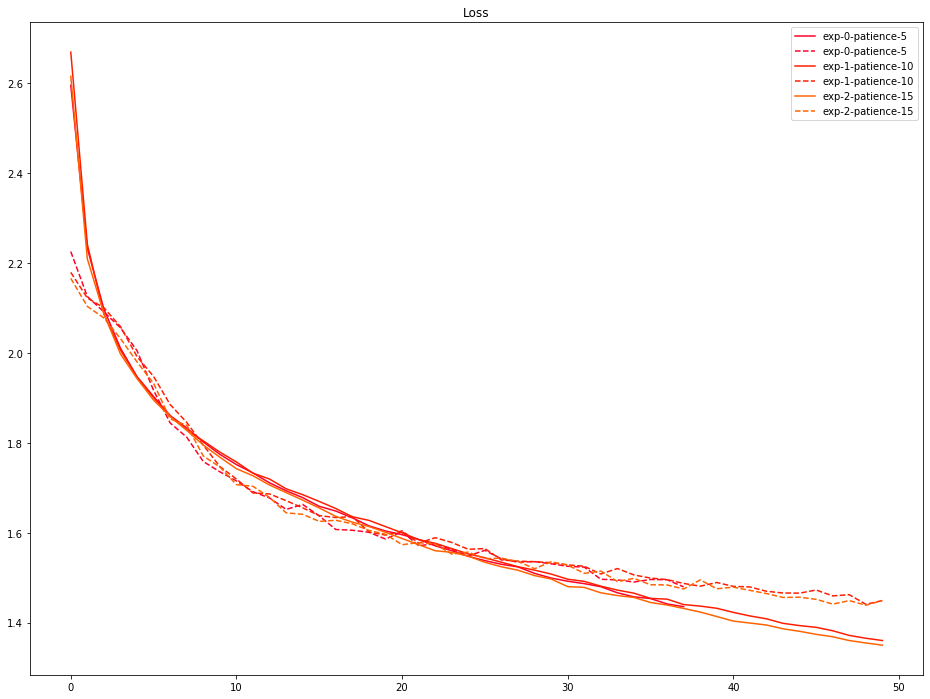

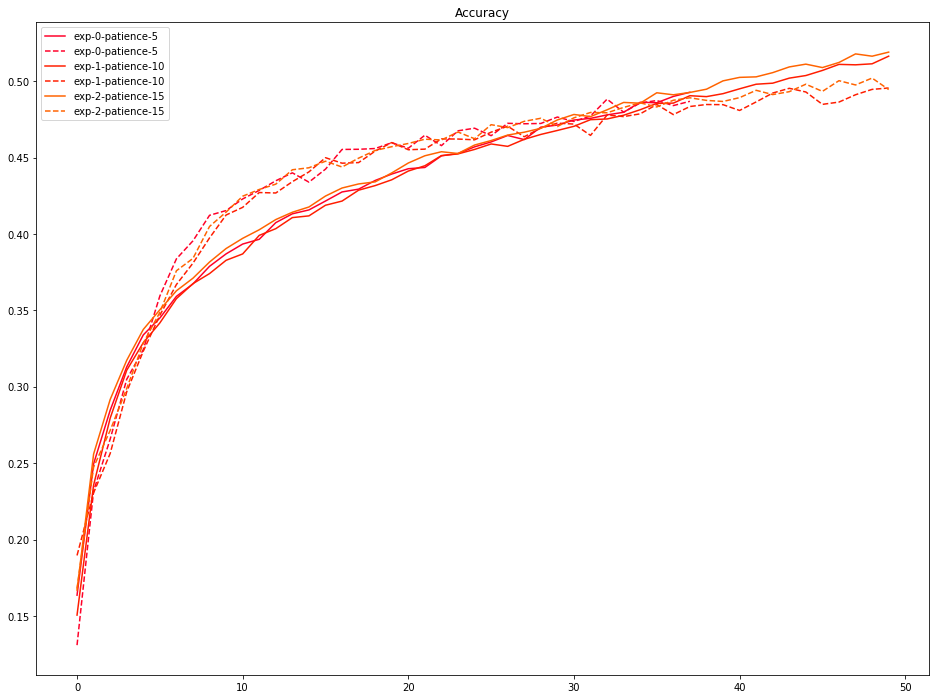

In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]
"""Code Here
將結果繪出
"""
NUM_COLORS = 20
plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()